# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import linregress


# Importing, Prepping and Visualizing Data

# Inflation Data

In [18]:
# Import and clean Infaltion data
inflation_file = "Data/inflation_1810025601-noSymbol.csv"
inflation_df = pd.read_csv(inflation_file, encoding="utf-8")
inflation_df = inflation_df.rename(columns={"Reference period":'Year'})

# Summerize average inflation by year and drop unwanted rows and columns:
pivot = pd.pivot_table(inflation_df, values='Percent', index=inflation_df['Year'].str[-4:], aggfunc='mean')
pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022, 2023], inplace=True)
inflation_df_avg = pd.DataFrame(pivot)
inflation_df_avg = inflation_df_avg.reset_index()
inflation_df_avg.head(13)

,Year,Percent
0,2009,2.716667
1,2010,1.191667
2,2011,1.816667
3,2012,1.708333
4,2013,1.183333
5,2014,1.350000
6,2015,1.775000
7,2016,1.616667
8,2017,1.183333
9,2018,1.833333


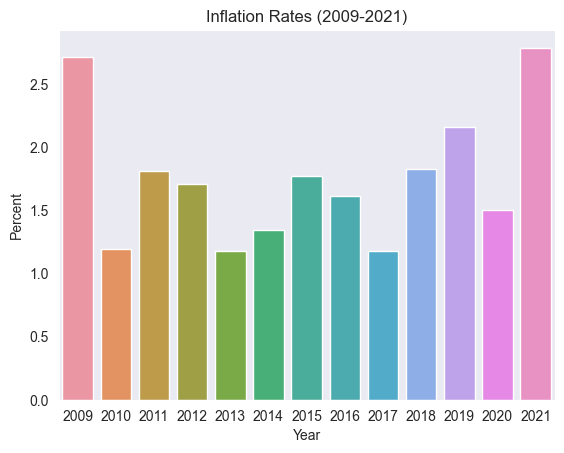

In [19]:
# plot Inflation Data

# create the bar plot
sns.set_style('dark')
ax = sns.barplot(x='Year', y='Percent', data=inflation_df_avg)

# set the plot title and axis labels
ax.set_title('Inflation Rates (2009-2021)')

plt.savefig("Inflation.png", dpi=300)

# Show the plot
plt.show()



# Household Spending

In [20]:
# Importing and cleaning HouseHold Spending Data
spending_file = "Data/spending2-3610012401-noSymbol.csv"
spending_df = pd.read_csv(spending_file, encoding="utf-8", on_bad_lines='skip')

# Create a new column 'Quarter' that contains the quarter of each year
spending_df['Quarter'] = spending_df['Year'].str[:2]
spending_df['Year'] = spending_df['Year'].str[3:]

# Summarize columns to match Payment Data
spending_df['Food and entertainment'] = spending_df[['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture']].sum(axis=1)
spending_df['Travel and Transport'] = spending_df[['Transport', 'Accommodation services']].sum(axis=1)

#Drop Combined columns 
spending_df.drop(columns=['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture', 'Transport', 'Accommodation services', 'Quarter' ], inplace=True)

# Rename columns for Asthetics on Graph
spending_df.rename(columns={"Furnishings, household equipment and other goods and services related to the dwelling and property": "Furniture", "Insurance and financial services" : "Insurance", "Miscellaneous goods and services": "Miscellaneous"}, inplace=True)


pivot = pd.pivot_table(spending_df, index=['Year'], 
                              values=['Clothing and footwear', 'Furniture', 'Health', 
                                      'Communications', 'Education', 'Insurance', 
                                      'Miscellaneous', 'Net expenditure abroad', 
                                      'Food and entertainment', 'Travel and Transport'], 
                              aggfunc='sum')

pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022,], inplace=True)

spending_df = pivot
spending_df.head(15)


,Clothing and footwear,Communications,Education,Food and entertainment,Furniture,Health,Insurance,Miscellaneous,Net expenditure abroad,Travel and Transport
Year,,,,,,,,,,
2009,36824,22550,12162,201481,51526,37537,74669,45872,13384,128185
2010,38478,23421,13169,207166,52702,39522,80704,47866,15290,140336
2011,39679,24744,14114,212421,53082,41070,84381,49873,16450,151259
2012,40632,25559,15140,217512,53600,42190,84478,51756,17392,158619
2013,42055,26839,16227,221896,54925,43764,88827,53371,17794,167301
2014,43974,28207,17184,229317,57214,45386,94556,55636,17629,176277
2015,46569,29520,18177,236696,59377,47520,98811,57757,17379,176516
2016,47270,30725,19261,242228,61778,49661,101962,59759,12631,182340
2017,48831,32825,20510,250565,64617,51921,107239,62452,11856,198974


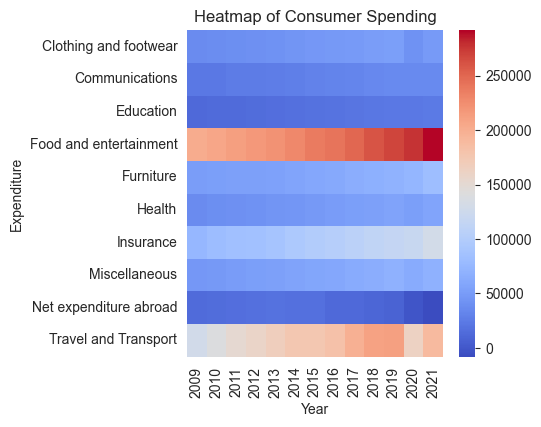

In [21]:
# Create heatmap using seaborn

# Transpose the DataFrame
spending_df_transpose = spending_df.transpose()

# Create heatmap using seaborn with transposed DataFrame
sns.heatmap(spending_df_transpose, cmap="coolwarm")

# Set plot title and axis labels
plt.title("Heatmap of Consumer Spending")
plt.xlabel("Year") # Switch x and y axis labels
plt.ylabel("Expenditure") # Switch x and y axis labels

#Adjust margins for clean saving
plt.subplots_adjust(left=0.4, bottom=0.2)

plt.savefig("spending_heat_map.png", dpi=300)

# Show the plot
plt.show()



# Merged Household Spending and Inflation

In [22]:
# Compare Inflation to  Spending 
merged_df = pd.merge(inflation_df_avg, spending_df, on='Year')
merged_df = merged_df.rename(columns={"Percent":'Inflation'})
merged_df = merged_df[['Year', 'Inflation', 
             'Clothing and footwear', 'Food and entertainment', 'Travel and Transport']]

merged_df = merged_df.set_index('Year')

merged_df.head(15)

,Inflation,Clothing and footwear,Food and entertainment,Travel and Transport
Year,,,,
2009,2.716667,36824,201481,128185
2010,1.191667,38478,207166,140336
2011,1.816667,39679,212421,151259
2012,1.708333,40632,217512,158619
2013,1.183333,42055,221896,167301
2014,1.350000,43974,229317,176277
2015,1.775000,46569,236696,176516
2016,1.616667,47270,242228,182340
2017,1.183333,48831,250565,198974


In [23]:
# Select the columns for which you want to calculate the percent change
cols_to_calculate_pct_change = ['Clothing and footwear', 'Food and entertainment', 'Travel and Transport']

# Calculate the percent change for each year for the selected columns
pct_change_df = merged_df[cols_to_calculate_pct_change].pct_change() * 100

# Add the percent change values to the original DataFrame
merged_df[cols_to_calculate_pct_change] = pct_change_df

# Print the updated DataFrame
merged_df.head()


,Inflation,Clothing and footwear,Food and entertainment,Travel and Transport
Year,,,,
2009,2.716667,NaN,NaN,NaN
2010,1.191667,4.491636,2.821606,9.479268
2011,1.816667,3.121264,2.536613,7.783463
2012,1.708333,2.401774,2.396656,4.865826
2013,1.183333,3.502166,2.015521,5.473493


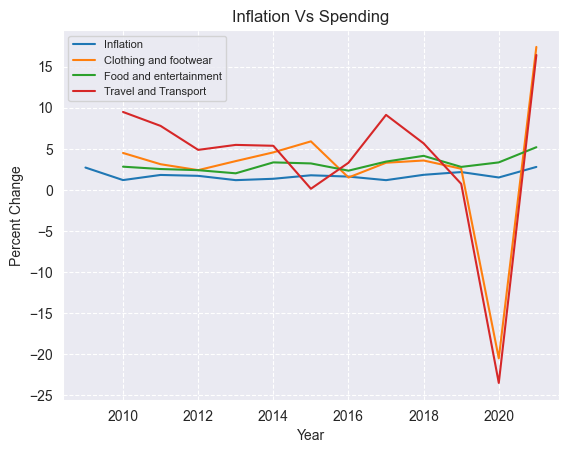

In [24]:
#Plot the data

sns.set_style('dark')
merged_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.title("Inflation Vs Spending")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=8, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("line_plot.png", dpi=300)

# Show Plot
plt.show()


# Liabilities 

In [25]:
# Import and clean Liabilities Data 
Liabilities_data_path = "CleanData/Liabilities.csv"
Liabilities_df = pd.read_csv(Liabilities_data_path)
Liabilities_df = Liabilities_df.rename(columns={"REF_DATE": "Year", "VALUE": "Amount", "Credit liabilities of households": "Credit_Liabilities"})

# Summerrize data by year
Liabilities_df = Liabilities_df[['Year', 'Credit_Liabilities', 'Amount']]
Liabilities_df['Year'] = pd.to_datetime(Liabilities_df['Year']).dt.year
pivot_table = pd.pivot_table(Liabilities_df, values='Amount', index='Year', columns=['Credit_Liabilities'], aggfunc=np.sum)

#Extracting columns for Chart
Liabilities_summary_df = pivot_table[['Credit cards', 'Financial vehicle corporations engaged in securitization', 
             'Lines of credit, of which: excluding home equity lines of credit', 'Personal loans']]
Liabilities_summary_df = Liabilities_summary_df.rename(columns={'Financial vehicle corporations engaged in securitization': 'Vehicle', 'Lines of credit, of which: excluding home equity lines of credit': 'LOC'})


Liabilities_summary_df 

Credit_Liabilities,Credit cards,Vehicle,LOC,Personal loans
Year,,,,
2009,648132,4002081,569178,648396
2010,682701,4176589,640976,705839
2011,799031,3010592,689859,788553
2012,921374,366716,669435,871156
2013,880984,404306,707776,1045148
2014,895696,387754,732903,1134831
2015,923048,388486,809070,1142789
2016,951960,410667,837852,1181341
2017,984283,404088,856656,1212220


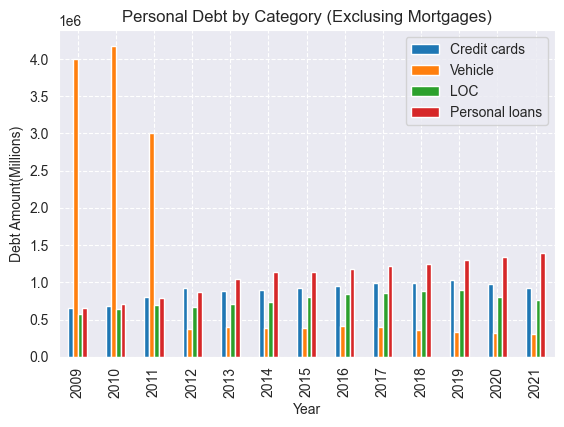

In [26]:
# Plot Payment Data 
sns.set_style('dark')
Liabilities_summary_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Debt Amount(Millions)")
plt.title("Personal Debt by Category (Exclusing Mortgages)")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=10, fancybox=True)

plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG image file
plt.savefig("Liabilities_plot.png", dpi=300)

# Show Plot
plt.show()

# Payment Method Data

In [27]:
# Import and clean Payment Data 
payment_data_path = "CleanData/MethodofPayment.csv"
PaymentMethod_df = pd.read_csv(payment_data_path)
PaymentMethod_df = PaymentMethod_df.rename(columns={"Debit Card": "Debit", "Credit Card": "Credit"})

# Summerrize data by year
pivot_table = pd.pivot_table(PaymentMethod_df, index=["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
sum_Payment_df = pivot_table
sum_Payment_df.head(15)

,Cash,Credit,Debit,Other
Year,,,,
2009,233.4,447.6,267.2,51.8
2013,216.1,491.5,209.3,83.1
2017,154.7,614.0,193.1,38.2
2021,103.1,623.2,183.3,90.4


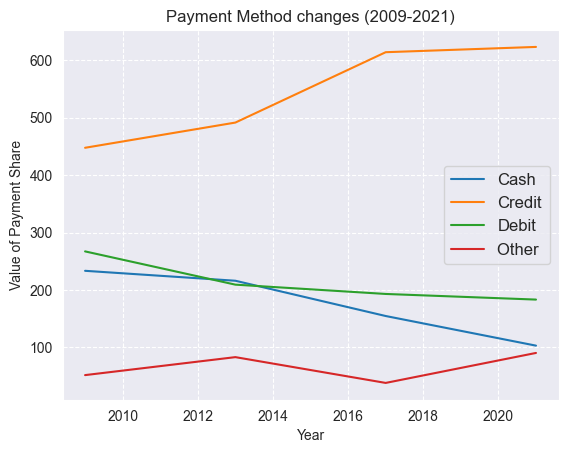

In [28]:
# Plot Payment Data 
sns.set_style('dark')
sum_Payment_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Value of Payment Share")
plt.title("Payment Method changes (2009-2021)")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("payment_plot.png", dpi=300)

# Show Plot
plt.show()


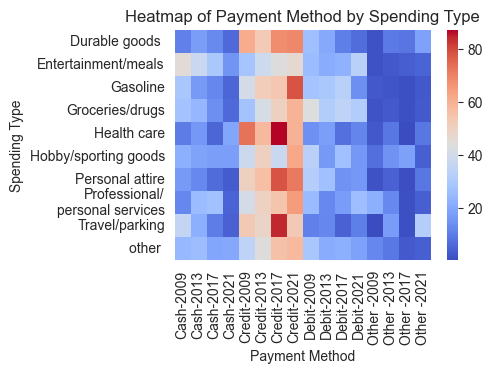

In [29]:
# Create pivot table
spending_pivot = pd.pivot_table(PaymentMethod_df, index=["Spending Type"], columns= ["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
spendingByType_df = spending_pivot

# Create heatmap using seaborn
sns.heatmap(spendingByType_df, cmap="coolwarm")

# Set plot title and axis labels
plt.title("Heatmap of Payment Method by Spending Type")
plt.xlabel("Payment Method")
plt.ylabel("Spending Type")

#Adjust margins for clean saving
plt.subplots_adjust(left=0.4, bottom=0.4)

plt.savefig("heat_map.png", dpi=300)

# Show the plot
plt.show()


# Anova Testing

In [30]:
# Merge DFs

new_merged_df = pd.merge(inflation_df_avg, Liabilities_summary_df, on='Year')
new_merged_df = pd.merge(new_merged_df, spending_df, on='Year')
new_merged_df = pd.merge(new_merged_df, sum_Payment_df, on='Year')
new_merged_df = new_merged_df.rename(columns={"Percent":'Inflation'})
new_merged_df.head()

,Year,Inflation,Credit cards,Vehicle,LOC,Personal loans,Clothing and footwear,Communications,Education,Food and entertainment,Furniture,Health,Insurance,Miscellaneous,Net expenditure abroad,Travel and Transport,Cash,Credit,Debit,Other
0,2009,2.716667,648132,4002081,569178,648396,36824,22550,12162,201481,51526,37537,74669,45872,13384,128185,233.4,447.6,267.2,51.8
1,2013,1.183333,880984,404306,707776,1045148,42055,26839,16227,221896,54925,43764,88827,53371,17794,167301,216.1,491.5,209.3,83.1
2,2017,1.183333,984283,404088,856656,1212220,48831,32825,20510,250565,64617,51921,107239,62452,11856,198974,154.7,614.0,193.1,38.2
3,2021,2.791667,926266,305959,762187,1393668,48417,36407,23569,291590,81919,57077,129196,68243,-8073,188619,103.1,623.2,183.3,90.4


In [31]:
# merging data for analysis

new_merged_df['Debt'] = new_merged_df[['Credit cards', 'Vehicle', 'LOC', 'Personal loans']].sum(axis=1)
new_merged_df['Non-Cash'] = new_merged_df[['Credit', 'Debit']].sum(axis=1)

new_merged_df.head()

,Year,Inflation,Credit cards,Vehicle,LOC,Personal loans,Clothing and footwear,Communications,Education,Food and entertainment,...,Insurance,Miscellaneous,Net expenditure abroad,Travel and Transport,Cash,Credit,Debit,Other,Debt,Non-Cash
0,2009,2.716667,648132,4002081,569178,648396,36824,22550,12162,201481,...,74669,45872,13384,128185,233.4,447.6,267.2,51.8,5867787,714.8
1,2013,1.183333,880984,404306,707776,1045148,42055,26839,16227,221896,...,88827,53371,17794,167301,216.1,491.5,209.3,83.1,3038214,700.8
2,2017,1.183333,984283,404088,856656,1212220,48831,32825,20510,250565,...,107239,62452,11856,198974,154.7,614.0,193.1,38.2,3457247,807.1
3,2021,2.791667,926266,305959,762187,1393668,48417,36407,23569,291590,...,129196,68243,-8073,188619,103.1,623.2,183.3,90.4,3388080,806.5


In [32]:
# merging data for analysis
new_merged_df['Discretionary'] = new_merged_df[['Clothing and footwear', 'Food and entertainment', 'Travel and Transport']].sum(axis=1)
Discretionary_df = new_merged_df

Discretionary_df

,Year,Inflation,Credit cards,Vehicle,LOC,Personal loans,Clothing and footwear,Communications,Education,Food and entertainment,...,Miscellaneous,Net expenditure abroad,Travel and Transport,Cash,Credit,Debit,Other,Debt,Non-Cash,Discretionary
0,2009,2.716667,648132,4002081,569178,648396,36824,22550,12162,201481,...,45872,13384,128185,233.4,447.6,267.2,51.8,5867787,714.8,366490
1,2013,1.183333,880984,404306,707776,1045148,42055,26839,16227,221896,...,53371,17794,167301,216.1,491.5,209.3,83.1,3038214,700.8,431252
2,2017,1.183333,984283,404088,856656,1212220,48831,32825,20510,250565,...,62452,11856,198974,154.7,614.0,193.1,38.2,3457247,807.1,498370
3,2021,2.791667,926266,305959,762187,1393668,48417,36407,23569,291590,...,68243,-8073,188619,103.1,623.2,183.3,90.4,3388080,806.5,528626


In [33]:
# Perform the ANOVA test

# Compute the ANOVA
f_statistic, p_value = stats.f_oneway(new_merged_df['Debt'], new_merged_df['Inflation'], new_merged_df['Non-Cash'], new_merged_df['Clothing and footwear'], new_merged_df['Food and entertainment'], new_merged_df['Travel and Transport'])

# Create DataFrame for results
df_anova = pd.DataFrame({'F-Statistic': [f_statistic], 'P-Value': [p_value]})

# Print the results
print(df_anova)

# Save the DataFrame to a file
df_anova.to_csv('anova_results.csv', index=False)



   F-Statistic       P-Value
0    35.119721  1.123427e-08


In [34]:
# Compute ANOVA between Debt and Non-Cash
f_statistic, p_value = stats.f_oneway(new_merged_df['Debt'], new_merged_df['Non-Cash'])

# Create DataFrame for results
df_anova = pd.DataFrame({'F-Statistic': [f_statistic], 'P-Value': [p_value]})

# Print the results
print(df_anova)

# Save the DataFrame to a file
df_anova.to_csv('anova_results.csv', index=False)




   F-Statistic   P-Value
0    36.707779  0.000916
